In [1]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
df = pd.read_csv('dropcast_bacbm2.csv').iloc[:-1,:]

In [4]:
voltagem = df['Voltage'].values
correntes = df[['D0','D1','D2','D3','D4']].values
concentrations = np.array([0.01, 0.1, 1, 10, 100])
concentrations = np.log10(concentrations)

In [5]:
def find_peak_currents(correntes):
    peak_currents = []
    peak_indices = []
    for i in range(correntes.shape[1]):
        peak_index = np.argmax(correntes[:, i])  # Índice do valor máximo
        peak_current = correntes[peak_index, i]  # Valor máximo de corrente
        peak_currents.append(peak_current)
        peak_indices.append(peak_index)
    return np.array(peak_currents), np.array(peak_indices)

def objective(trial):
    # Testando parâmetros para ajuste linear
    model = LinearRegression()

    # Ajuste linear entre concentrações e picos de corrente
    concentrations_reshaped = concentrations.reshape(-1, 1)
    model.fit(concentrations_reshaped, peak_currents)

    # Previsão e cálculo do erro
    peak_currents_pred = model.predict(concentrations_reshaped)
    mse = mean_squared_error(peak_currents, peak_currents_pred)

    return mse

Concentração -2.0: Pico de Corrente = 133.531616210938, Voltagem Correspondente = 0.1526956558227539
Concentração -1.0: Pico de Corrente = 132.492111206055, Voltagem Correspondente = 0.1526956558227539
Concentração 0.0: Pico de Corrente = 107.343627929688, Voltagem Correspondente = 0.1562118530273437
Concentração 1.0: Pico de Corrente = 105.85107421875, Voltagem Correspondente = 0.1562118530273437
Concentração 2.0: Pico de Corrente = 94.6930847167969, Voltagem Correspondente = 0.1562118530273437


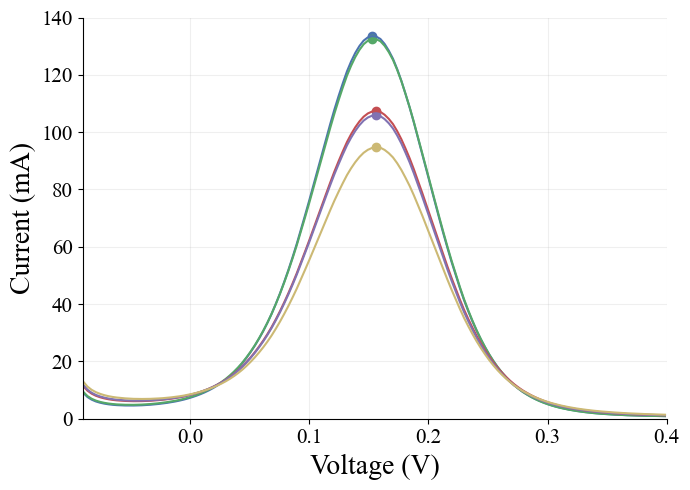

In [6]:
plt.figure(figsize=(7,5))

peak_currents, peak_indices = find_peak_currents(correntes)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

for i, peak in enumerate(peak_currents):
    plt.plot(df['Voltage'],df.iloc[:,i+1],color=colors[i])
    plt.scatter(voltagem[peak_indices[i]],peak_currents[i],color=colors[i])
    print(f"Concentração {concentrations[i]}: Pico de Corrente = {peak}, Voltagem Correspondente = {voltagem[peak_indices[i]]}")

plt.xlim(-0.09,0.4)
plt.ylim(0,140)
plt.grid(alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Voltage (V)',fontsize=20),plt.ylabel('Current (mA)',fontsize=20)
# plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('current.png',dpi=500,transparent=True)

In [7]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-10-15 11:18:31,529] A new study created in memory with name: no-name-df6637d3-808c-422b-8fff-cd402356418f
[I 2024-10-15 11:18:31,540] Trial 0 finished with value: 23.124975980067582 and parameters: {}. Best is trial 0 with value: 23.124975980067582.
[I 2024-10-15 11:18:31,542] Trial 1 finished with value: 23.124975980067582 and parameters: {}. Best is trial 0 with value: 23.124975980067582.
[I 2024-10-15 11:18:31,544] Trial 2 finished with value: 23.124975980067582 and parameters: {}. Best is trial 0 with value: 23.124975980067582.
[I 2024-10-15 11:18:31,548] Trial 3 finished with value: 23.124975980067582 and parameters: {}. Best is trial 0 with value: 23.124975980067582.
[I 2024-10-15 11:18:31,550] Trial 4 finished with value: 23.124975980067582 and parameters: {}. Best is trial 0 with value: 23.124975980067582.
[I 2024-10-15 11:18:31,554] Trial 5 finished with value: 23.124975980067582 and parameters: {}. Best is trial 0 with value: 23.124975980067582.
[I 2024-10-15 11:18:31

In [8]:
print("Erro quadrático médio mínimo:", study.best_value)

Erro quadrático médio mínimo: 23.124975980067582


In [9]:
model = LinearRegression()
concentrations_reshaped = concentrations.reshape(-1, 1)
model.fit(concentrations_reshaped, peak_currents)
peak_currents_pred = model.predict(concentrations_reshaped)

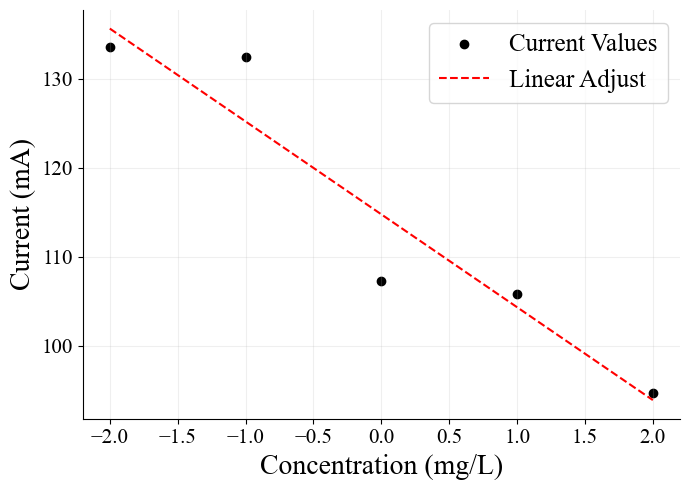

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(concentrations, peak_currents, label='Current Values',color='black')
plt.plot(concentrations, peak_currents_pred, color='red', linestyle='--', label='Linear Adjust')
plt.xlabel('Concentration (mg/L)',fontsize=20),plt.ylabel('Current (mA)',fontsize=20)
plt.legend(fontsize=18)
plt.grid(alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.xscale('log')
# plt.xlim(-2.1,2.1)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
# plt.savefig('linear_fit.png',dpi=500,transparent=True)

plt.show()

In [11]:
df['Voltage'][34]

0.0228519439697265

In [12]:
fit_ruim = []
for column in list(df.columns)[1:]:
    fit_ruim.append(df[column][34])

In [13]:
from sklearn.metrics import r2_score

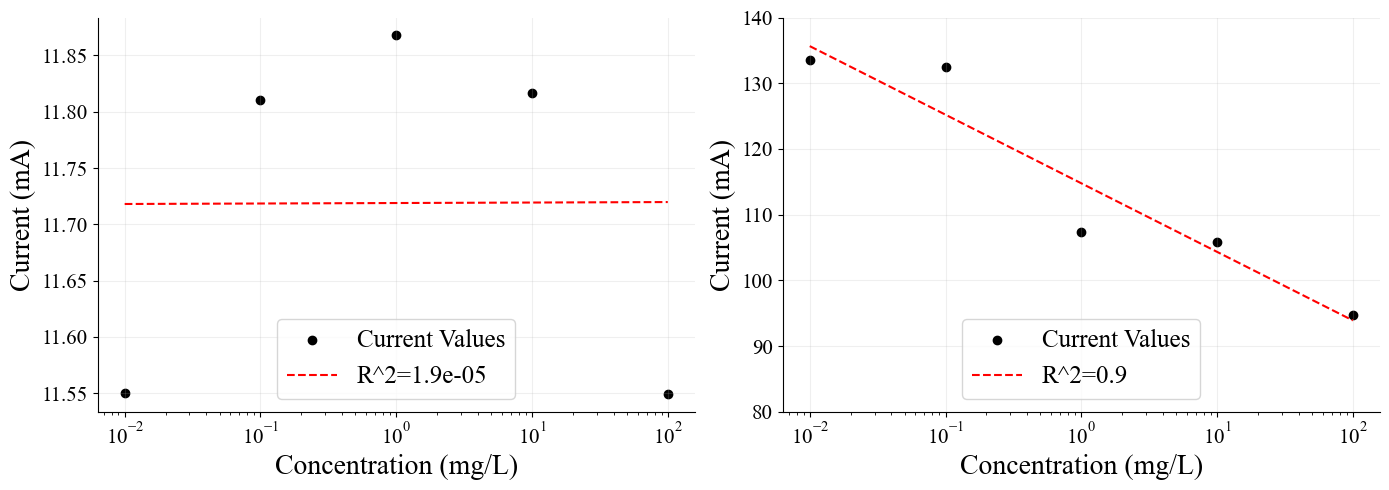

In [25]:
plt.figure(figsize=(14,5))

plt.subplot(121)

plt.scatter(np.array([0.01, 0.1, 1, 10, 100]), fit_ruim, label='Current Values',color='black')

model = LinearRegression()
concentrations_reshaped = concentrations.reshape(-1, 1)
model.fit(concentrations_reshaped, fit_ruim)
fit_ruim_data = model.predict(concentrations_reshaped)
r2_ruim = r2_score(fit_ruim, fit_ruim_data)

plt.plot(np.array([0.01, 0.1, 1, 10, 100]), fit_ruim_data, color='red', linestyle='--', label=f'R^2={round(r2_ruim,6)}')
plt.xlabel('Concentration (mg/L)',fontsize=20)
plt.ylabel('Current (mA)',fontsize=20)
plt.legend(fontsize=18,loc='lower center')
plt.grid(alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xscale('log')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

model = LinearRegression()
concentrations_reshaped = concentrations.reshape(-1, 1)
model.fit(concentrations_reshaped, peak_currents)
peak_currents_pred = model.predict(concentrations_reshaped)
r2_bom = r2_score(peak_currents, peak_currents_pred)

plt.subplot(122)

plt.scatter(np.array([0.01, 0.1, 1, 10, 100]), peak_currents, label='Current Values',color='black')
plt.plot(np.array([0.01, 0.1, 1, 10, 100]), peak_currents_pred, color='red', linestyle='--', label=f'R^2={round(r2_bom,2)}')
plt.xlabel('Concentration (mg/L)',fontsize=20),plt.ylabel('Current (mA)',fontsize=20)
plt.legend(fontsize=18,loc='lower center')
plt.grid(alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xscale('log')

plt.ylim(80,140)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('linear_fit.png',dpi=500,transparent=True)

plt.show()

In [37]:
r2_ruim

1.8912648780067265e-05